# Assignment of K-Nearest Neighbor(KNN) Algorithm

# KNN Regressor

In [1]:
# importing pandas as pd
# Importing numpy as np
# Importing pyplot as plt from matplotlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import data set

In [2]:
# importing data using .read_excel() function
df = pd.read_excel('C:\\Masum\\Data Science\\Python\\Class 09\\weight-height.xlsx')

In [3]:
#printing Datafram
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


# Converting Categorical Data Columns to Numerical.

In [4]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

In [5]:
#Creating a instance of label Encoder.
le = LabelEncoder()

In [6]:
#Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['Gender'])

In [7]:
#printing label
label

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
# removing the column 'Gender' from df
# as it is of no use now.
df.drop("Gender", axis=1, inplace=True)

In [9]:
# Appending the array to our dataFrame
# with column name 'Gender'
df['Gender'] = label

In [10]:
# printing Dataframe
df.head()

,Height,Weight,Gender
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [11]:
#Creating copy of Datafram
df1 = df.copy()
df2 = df.copy()

# Seperate x(Gender, Height) and y (y=Weight)

In [12]:
#Separate Target Variable and Predictor Variables
x = df1[['Gender','Height']]
y = df1['Weight']

In [13]:
#Printing value of x
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [14]:
#Printing value of y
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# Train = 70%, Test = 30%

In [15]:
#importing train_test_split from sklearn
#library from Module_selection.
from sklearn.model_selection import train_test_split

In [16]:
#train 70% data and test 30%
xtrain,xtest, ytrain,ytest = train_test_split(x,y, test_size=.30)

# Apply Linear Regression

# Model Creation

In [17]:
# Importing  LinearRegression from Sklearn
# library from linear Module.
from sklearn.linear_model import LinearRegression

In [18]:
#Creating a instance of LinearRegression.
reg = LinearRegression()

In [19]:
#Using .fit function to fit data
reg.fit(xtrain,ytrain)

LinearRegression()

In [20]:
#Find cooefficient
reg.coef_

array([19.90802668,  5.89913261])

In [21]:
#Find intercept 
reg.intercept_

-240.0940007582209

In [22]:
#predict for y (gender) for the value of x(Height and weight)
df1['predicted results'] = reg.predict(x)

In [23]:
#print Dataframe
df1

,Height,Weight,Gender,predicted results
0,73.847017,241.893563,1,215.447372
1,68.781904,162.310473,1,185.567599
2,74.110105,212.740856,1,216.999365
3,71.730978,220.042470,1,202.964580
4,69.881796,206.349801,1,192.056007
...,...,...,...,...
8550,60.483946,110.565497,0,116.708815
8551,63.423372,129.921671,0,134.048878
8552,65.584057,155.942671,0,146.795047
8553,67.429971,151.678405,0,157.684342


In [24]:
#Creating a instance of Prediction.
pred = reg.predict(xtest)

In [25]:
# corr. result of ytest / y
pred 

array([200.30102322, 203.92474122, 200.05808591, ..., 153.81348333,
       160.47038968, 201.10155551])

In [26]:
#check the accuracy of a linear regression model
score = reg.score(xtrain,ytrain)

In [27]:
#Fine the accuracy of the model
score

0.9001112219760747

In [28]:
# Importing  mean_squared_error from Sklearn
# library from metrics.
from sklearn.metrics import mean_squared_error

In [29]:
#Creating a instance of mean_squared_error.
mse = mean_squared_error(ytest, pred)

In [30]:
#print mean_squared_error value
mse

104.89491360088114

In [31]:
# Importing  mean_absolute_error from Sklearn
# library from metrics.
from sklearn.metrics import mean_absolute_error

In [32]:
#Creating a instance of mean_absolute_error.
mae = mean_absolute_error(ytest, pred)

In [33]:
#print mean_absolute_error value
mae

8.080894777919147

# Apply KNN Regressor: 

In [34]:
#K-Nearest Neighbour(KNN) Regression
from sklearn.neighbors import KNeighborsRegressor

In [35]:
#Creating a instance of label KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=2)

In [36]:
RegModel

KNeighborsRegressor(n_neighbors=2)

In [37]:
#Creating the model on Training Data
KNN=RegModel.fit(xtrain,ytrain)
prediction=KNN.predict(xtest)

In [38]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(ytrain, KNN.predict(xtrain)))

R2 Value: 0.9495825142323889


In [39]:
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((ytest - prediction) / ytest)) * 100))

Accuracy 93.51341464590143


# Evaluate the prediction error on the training data

In [40]:
# Importing  mean_squared_error from Sklearn
# library from metrics.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 

In [41]:
#import sqrt from math
from math import sqrt

In [42]:
#Creating a instance of Prediction.
test_preds = RegModel.predict(xtest)

In [43]:
#Creating a instance of mean_squared_error.
mse = mean_squared_error(ytest, test_preds)

In [44]:
#print mean_squared_error value
mse

163.3055802844848

In [45]:
#Creating a instance of mean_absolute_error .
msa = mean_absolute_error (ytest, test_preds)

In [46]:
#print mean_absolute_error value
msa

10.138707144881185

# KNN Classifier

In [47]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [48]:
#Separate Target Variable and Predictor Variables
X = df2[['Weight','Height']]
Y = df2['Gender']

In [49]:
# Split into training and test set
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size = 0.3)

In [50]:
#Creating a instance of label KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [51]:
knn

KNeighborsClassifier()

In [58]:
# printing Dataframe
df2.head()

,Height,Weight,Gender
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [59]:
#Creating a instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [60]:
#Using .fit function to fit data
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=7)

In [61]:
# Predict on dataset which model has not seen before
knn.predict(Xtest)

array([1, 0, 0, ..., 1, 0, 0])

In [62]:
# Calculate the accuracy of the model
score = knn.score(Xtrain,Ytrain)

In [63]:
#print accuaracy of the model 
score 

0.924181696726787

In [64]:
#import DecisionTreeClassifier from sklearn
#import #import DecisionTreeClassifier from sklearn from sklearn metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [65]:
#Creating a instance of DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [66]:
clf

DecisionTreeClassifier()

In [67]:
#Using .fit function to fit data
clf.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [68]:
#Creating a instance of Prediction.
pred = clf.predict(Xtest)

In [69]:
# corr. result of ytest / y
pred

array([1, 0, 0, ..., 1, 0, 0])

In [70]:
np.array(ytest)

array([209.9001307, 203.2208674, 205.3857099, ..., 141.0569889,
       150.7244488, 196.5004927])

In [71]:
#Show the clasification report
print(classification_report(Ytest, pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1093
           1       0.90      0.89      0.89      1474

    accuracy                           0.88      2567
   macro avg       0.87      0.88      0.88      2567
weighted avg       0.88      0.88      0.88      2567



In [72]:
confusion_matrix(Ytest, pred)

array([[ 939,  154],
       [ 160, 1314]], dtype=int64)

In [73]:
accuracy_score(Ytest, pred)

0.8776782236073237

In [74]:
(901+1326)/(901+154+186+1326)

0.8675496688741722

In [75]:
tp, fn, fp, tn = confusion_matrix(Ytest, pred).reshape(-1) 

# Accuracy

In [76]:
#Accuricy calculation
acc = (tp+tn)/(tp+tn+fp+fn)

In [77]:
#print accouracy
acc

0.8776782236073237

# Area Under the Curve (AUC) of “Receiver Characteristic Operator (ROC)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


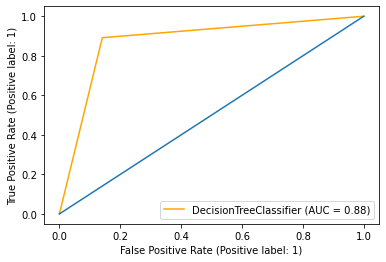

In [78]:
#plot AUC-ROC Curve
plot_roc_curve(clf,Xtest,Ytest,color='orange')
plt.plot([0,1], [0,1])